In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Load Dataset

In [2]:
filePath = "~/Git/DSSchool_Study/study/kaggle_predict_future_sale/data"

train = pd.read_csv(filePath + "/sales_train.csv", parse_dates=["date"])
item_categorizes = pd.read_csv(filePath + "/item_categories.csv")
items = pd.read_csv(filePath + "/items.csv")
shops = pd.read_csv(filePath + "/shops.csv")

In [3]:
test = pd.read_csv(filePath + "/test.csv")
submit = pd.read_csv(filePath + "/sample_submission.csv")

In [4]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [5]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
submit.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


# Preprocessing

## - parse datetime

In [7]:
train['date-year'] = train['date'].dt.year
train['date-month'] = train['date'].dt.month
train['date-day'] = train['date'].dt.day

In [9]:
train[["date", 'date-year', 'date-month', 'date-day']].head()

,date,date-year,date-month,date-day
0,2013-02-01,2013,2,1
1,2013-03-01,2013,3,1
2,2013-05-01,2013,5,1
3,2013-06-01,2013,6,1
4,2013-01-15,2013,1,15


In [22]:
train['date-dayofweek'] = train['date'].dt.dayofweek

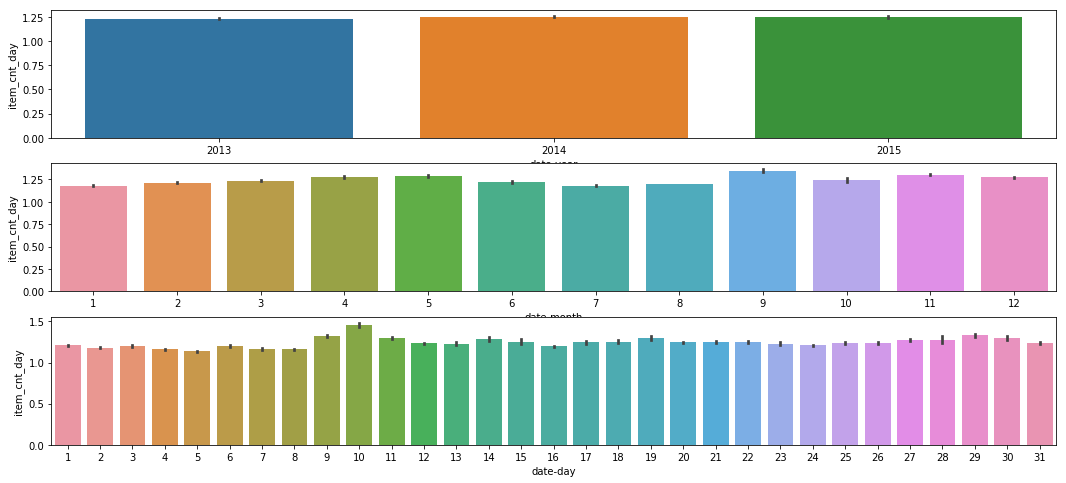

In [12]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="date-year", y="item_cnt_day", ax=ax1)
sns.barplot(data=train, x="date-month", y="item_cnt_day", ax=ax2)
sns.barplot(data=train, x="date-day", y="item_cnt_day", ax=ax3)

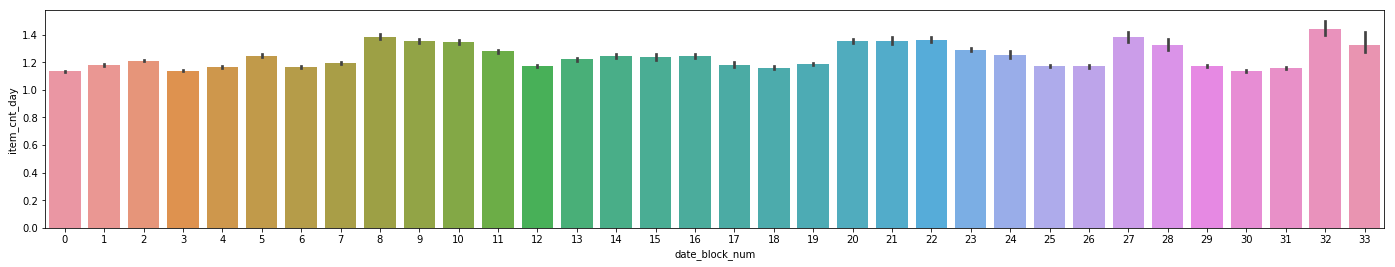

In [24]:
plt.figure(figsize=(24,4))
sns.barplot(data=train, x="date_block_num", y="item_cnt_day")

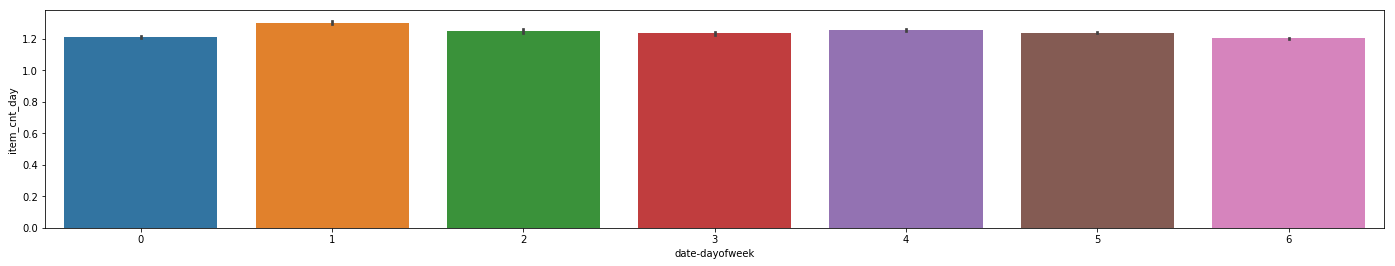

In [23]:
plt.figure(figsize=(24,4))
sns.barplot(data=train, x="date-dayofweek", y="item_cnt_day")

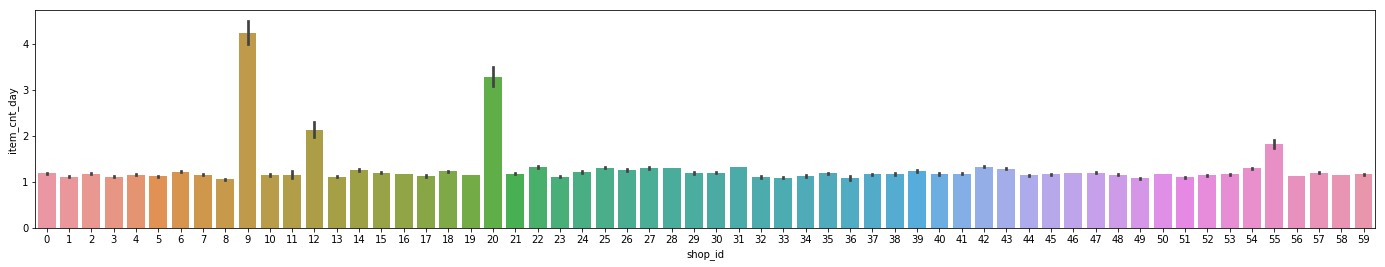

In [15]:
plt.figure(figsize=(24,4))
sns.barplot(data=train, x="shop_id", y="item_cnt_day")

<Figure size 1728x288 with 0 Axes>

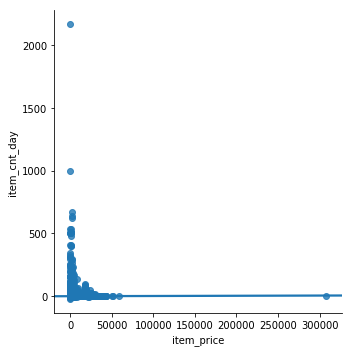

In [16]:
plt.figure(figsize=(24,4))
sns.lmplot(data=train, x="item_price", y="item_cnt_day")

In [20]:
train_removed_outlier = train[(train["item_price"] < 75000) & (train["item_cnt_day"] < 900)]

<Figure size 1728x288 with 0 Axes>

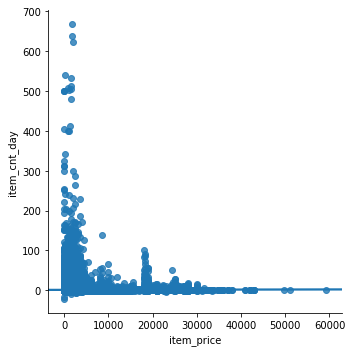

In [21]:
plt.figure(figsize=(24,4))
sns.lmplot(data=train_removed_outlier, x="item_price", y="item_cnt_day")

# Pivot Table

Text(0, 0.5, 'mean item_cnt sum by year')

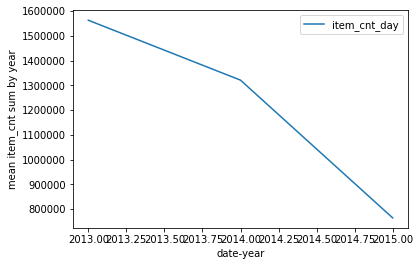

In [37]:
pd.pivot_table(data=train, index="date-year", values="item_cnt_day", aggfunc=np.sum).plot()
plt.ylabel('mean item_cnt sum by year')

Text(0, 0.5, 'mean item_cnt sum by month')

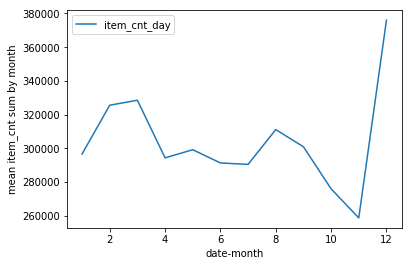

In [36]:
pd.pivot_table(data=train, index="date-month", values="item_cnt_day", aggfunc=np.sum).plot()
plt.ylabel('mean item_cnt sum by month')

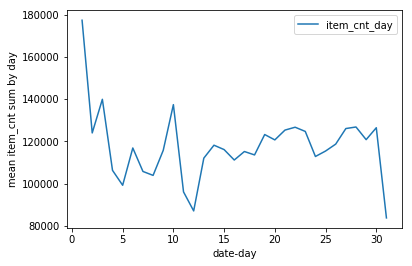

In [35]:
pd.pivot_table(data=train, index="date-day", values="item_cnt_day", aggfunc=np.sum).plot()
plt.ylabel('mean item_cnt sum by day')

Text(0, 0.5, 'mean item_cnt sum by day')

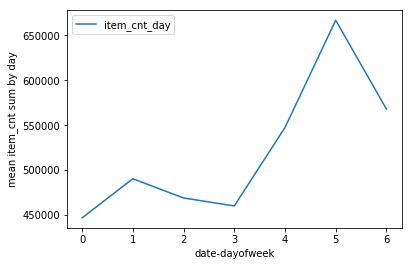

In [44]:
pd.pivot_table(data=train, index="date-dayofweek", values="item_cnt_day", aggfunc=np.sum).plot()
plt.ylabel('mean item_cnt sum by day')

Text(0, 0.5, 'mean item_cnt sum by day')

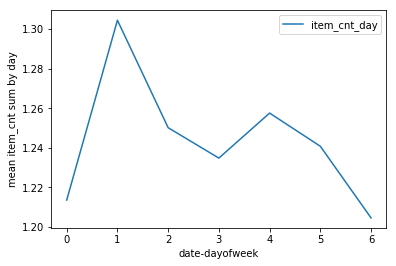

In [43]:
pd.pivot_table(data=train, index="date-dayofweek", values="item_cnt_day", aggfunc='mean').plot()
plt.ylabel('mean item_cnt sum by day')

In [ ]:
# item_cnt_day <0

In [ ]:
plt.figure(figsize=(24,4))
sns.barplot(data=train, x="date_block_num", y='item_cnt_day')

In [72]:
shoplist = []
for shop_id in range(60):
    shop = train[train['shop_id'] == shop_id]
    print(shop.shape)
    shoplist += shop    

(9857, 6)


ValueError: Unable to coerce to Series, length must be 6: given 0

In [5]:
shop0 = train[train['shop_id'] == 4]
shop0.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
30072,12.01.2013,0,4,5605,489.3,1.0
30073,03.01.2013,0,4,5587,199.0,1.0
30074,27.01.2013,0,4,5588,149.0,1.0
30075,21.01.2013,0,4,5613,6190.0,1.0
30076,08.01.2013,0,4,5627,2390.0,1.0


In [6]:
shop0[shop0['date_block_num'] == 30].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2719947,21.07.2015,30,4,4233,899.0,1.0
2719949,20.07.2015,30,4,6926,199.0,1.0
2719950,04.07.2015,30,4,6351,449.0,1.0
2719951,07.07.2015,30,4,6342,349.0,1.0
2719952,25.07.2015,30,4,6738,999.0,1.0


In [7]:
shop0['date'] = pd.to_datetime(shop0['date'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
shop0['date-year'] = shop0['date'].dt.year
shop0['date-month'] = shop0['date'].dt.month
shop0['date-day'] = shop0['date'].dt.day
shop0['date-weekday'] = shop0['date'].dt.weekday
shop0['date-hour'] = shop0['date'].dt.hour
shop0['date-minute'] = shop0['date'].dt.minute
shop0['date-second'] = shop0['date'].dt.second

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [13]:
plt.figure(figsize=(24,4))
# sns.barplot(data=shop0, x="date-year", y="item_cnt_day", aggfunc=np.sum)
pd.pivot_table(data=shop0, index="date-year", values="item_cnt_day", aggfunc=np.sum)

,item_cnt_day
date-year,
2013,19002.0
2014,15857.0
2015,9083.0


<Figure size 1728x288 with 0 Axes>

In [36]:
train.groupby(['shop_id', 'date_block_num']).sum()
# group.head()

item_id    item_price  item_cnt_day
shop_id date_block_num                                      
0       0               50791835  2.546339e+06        5578.0
        1               54019826  3.007530e+06        6127.0
1       0               28789014  1.378736e+06        2947.0
        1               32161359  1.547425e+06        3364.0
2       0               10025040  1.028861e+06        1146.0
        1                3676220  4.823465e+05         488.0
        2                5506859  6.463942e+05         753.0
        3                4407754  5.961960e+05         583.0
        4                4331370  5.186251e+05         553.0
        5                6748971  7.127570e+05         832.0
        6                6708194  8.405541e+05         807.0
        7                6233189  8.416586e+05         875.0
        8                5731637  9.337197e+05         945.0
        9                5055479  8.620419e+05         795.0
        10               5154101  8.833553e+05         862.0
        11               9330357  2.011789e+06        1322.0
        12               6637976  1.002970e+06         890.0
        13               5881222  1.110600e+06         911.0
        14               6605873  1.365037e+06         990.0
        15               5917481  9.868352e+05         791.0
        16               5693507  9.865805e+05         910.0
        17               6753715  1.111494e+06         957.0
        18               5917944  9.319004e+05         838.0
        19               6864178  1.020093e+06         956.0
        20               6206626  1.105799e+06         920.0
        21               6843819  1.229502e+06         945.0
        22               7006538  1.434123e+06        1192.0
        23              13134305  2.704724e+06        1921.0
        24               7667512  1.329241e+06         987.0
        25               7461221  8.400967e+05         907.0
...                          ...           ...           ...
59      4               11996482  7.731048e+05        1374.0
        5               14588031  9.946186e+05        1707.0
        6               16228367  1.006289e+06        1747.0
        7               17831226  1.092577e+06        2048.0
        8               15673286  1.153747e+06        2008.0
        9               14800921  1.123973e+06        1751.0
        10              15658956  1.232056e+06        1953.0
        11              19602366  1.955512e+06        2390.0
        12              13549921  1.107389e+06        1491.0
        13              11374996  1.135753e+06        1420.0
        14              12642682  1.173572e+06        1467.0
        15              10843719  8.438605e+05        1228.0
        16              10401223  9.149936e+05        1184.0
        17               9812491  9.790544e+05        1157.0
        18               9577620  8.024118e+05        1082.0
        19              11275390  1.124188e+06        1244.0
        20               9267912  1.144300e+06        1161.0
        21              10371122  1.230701e+06        1211.0
        22              12259809  1.691086e+06        1610.0
        23              16203452  2.225274e+06        1939.0
        24              11347048  1.202397e+06        1293.0
        25               9540613  9.813270e+05        1206.0
        26              10494200  8.846440e+05        1199.0
        27               8249429  7.287827e+05        1054.0
        28               7235398  7.308635e+05         916.0
        29               8448873  7.877389e+05         913.0
        30               9285194  8.085937e+05         992.0
        31               9177292  8.235957e+05        1214.0
        32               7333448  8.829707e+05         914.0
        33               7232848  8.232262e+05         790.0

[1586 rows x 3 columns]

In [15]:
shop0

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date-year,date-month,date-day,date-weekday,date-hour,date-minute,date-second
30072,2013-12-01,0,4,5605,489.3,1.0,2013,12,1,6,0,0,0
30073,2013-03-01,0,4,5587,199.0,1.0,2013,3,1,4,0,0,0
30074,2013-01-27,0,4,5588,149.0,1.0,2013,1,27,6,0,0,0
30075,2013-01-21,0,4,5613,6190.0,1.0,2013,1,21,0,0,0,0
30076,2013-08-01,0,4,5627,2390.0,1.0,2013,8,1,3,0,0,0
30077,2013-09-01,0,4,5627,2390.0,1.0,2013,9,1,6,0,0,0
30078,2013-04-01,0,4,5629,2390.0,1.0,2013,4,1,0,0,0,0
30079,2013-03-01,0,4,5643,2390.0,1.0,2013,3,1,4,0,0,0
30080,2013-01-31,0,4,5643,2270.5,2.0,2013,1,31,3,0,0,0
30081,2013-01-20,0,4,5651,5490.0,1.0,2013,1,20,6,0,0,0


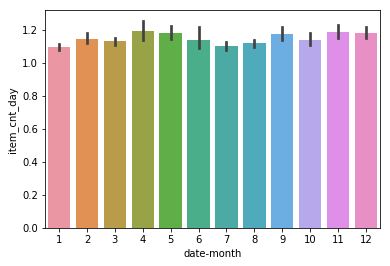

In [14]:
sns.barplot(data=shop0, x="date-month", y="item_cnt_day")